# Classification

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Load CSV dataset
#df=pd.read_csv("/content/HousePriceDataset (1).csv")
#df=pd.read_csv("/content/drive/MyDrive/data/machine_learning/HousePriceDataset.csv")
# Load CSV in YW
df=pd.read_csv("HousePriceDataset.csv")
print(f"Number of houses in dataset: {len(df)}")
print(f"Number of variables in dataset: {len(df.columns)}")
df=df.drop(columns=['Unnamed: 0'])
# Display the column names (features) in the dataset
print(f"Features in the dataset: {list(df.columns)}")

# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

Number of houses in dataset: 21613
Number of variables in dataset: 21
Features in the dataset: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.90000

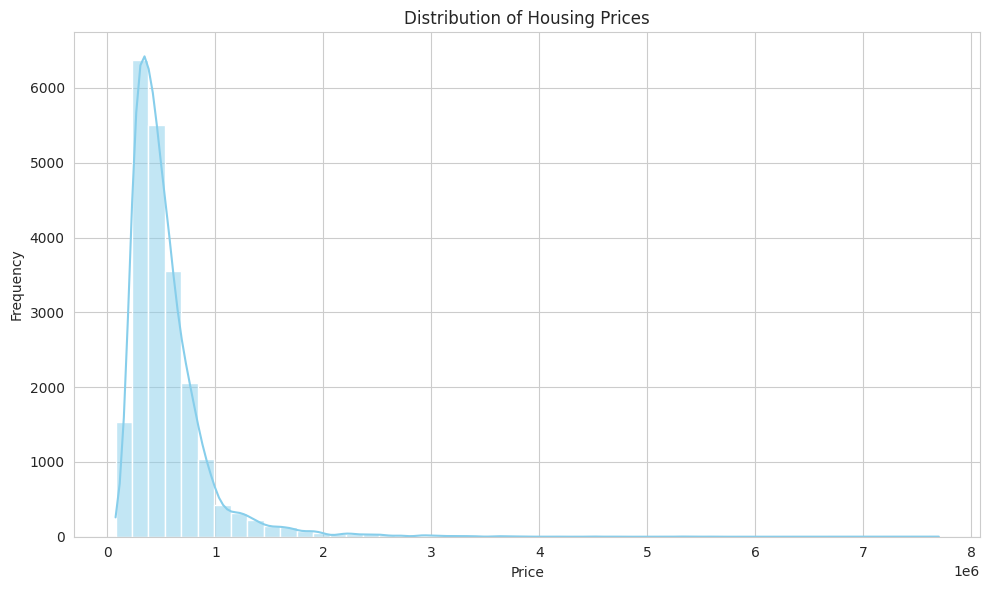

In [3]:
sns.set_style("whitegrid")

# Creating the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')

# Setting the title and labels
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_16661/4094044728.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_class', data=df, palette='cool')


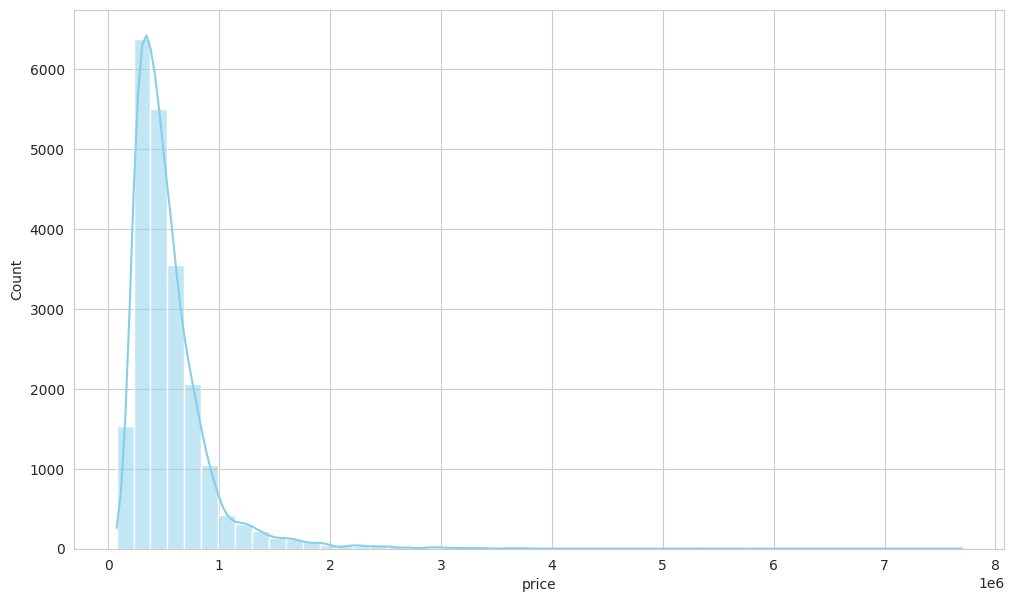

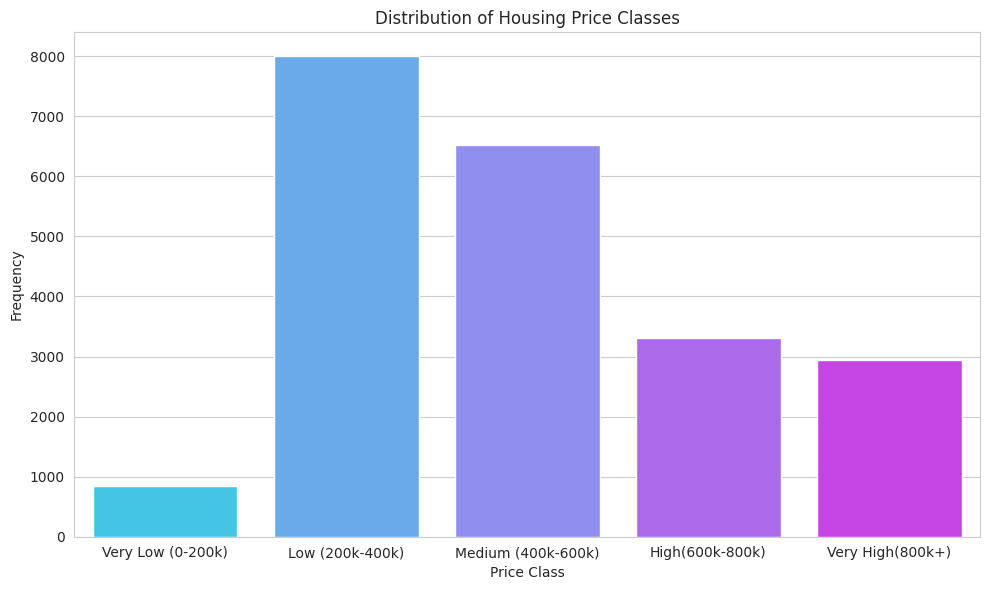

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

price_bins = [0, 200000, 400000, 600000, 800000, np.inf]
price_labels = ['Very Low (0-200k)', 'Low (200k-400k)', 'Medium (400k-600k)', 'High(600k-800k)', 'Very High(800k+)']

# Assign Classes
df['price_class'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)
plt.figure(figsize=(12, 7))
ax = sns.histplot(df['price'], kde=True, bins=50, color='skyblue')


plt.figure(figsize=(10, 6))
sns.countplot(x='price_class', data=df, palette='cool')
plt.title('Distribution of Housing Price Classes')
plt.xlabel('Price Class')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/home/leonardomonchieri/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/leonardomonchieri/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/leonardomonchieri/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/leonardomonchieri/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

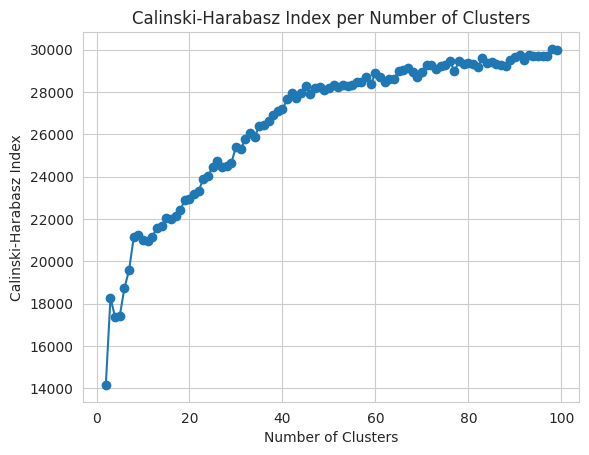

Optimal number of clusters: 98


/home/leonardomonchieri/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


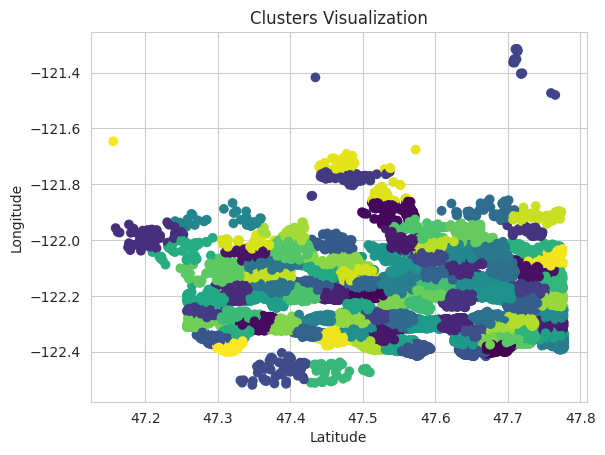

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

coords = df[['lat', 'long']]

# Calculate Calinski-Harabasz index for different numbers of clusters
calinski_harabasz_values = []

# Try many clusters as we scan a large area
n_clusters_range = range(2, 100)
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(coords)
    calinski_harabasz_values.append(calinski_harabasz_score(coords, labels))

# Plot the Calinski-Harabasz index scores
plt.plot(n_clusters_range, calinski_harabasz_values, marker='o')
plt.title('Calinski-Harabasz Index per Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.show()


optimal_clusters = n_clusters_range[calinski_harabasz_values.index(max(calinski_harabasz_values))]
print(f"Optimal number of clusters: {optimal_clusters}")

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(coords)

df['Cluster'] = clusters
plt.scatter(df['lat'], df['long'], c=clusters, cmap='viridis', marker='o')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters Visualization')
plt.show()

# Calculate and map average price for each cluster
avg_prices = df.groupby('Cluster')['price'].mean().to_dict()
df['Avg_Cluster_Price'] = df['Cluster'].map(avg_prices)


 Remove least 5 variables for complexity

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


### Clean the data  'sqft_lot15'
def clean_data(value):
    if isinstance(value, str) and value.startswith("b'"):
        return float(value[2:-1])
    return float(value)

df['sqft_lot15'] = df['sqft_lot15'].apply(clean_data)
df=df.drop(["sqft_lot","long","condition","yr_renovated","floors","Cluster","id","price","lat","zipcode"],axis=1)
df_x = df.drop(['price_class'],axis=1)
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df_x), columns=df_x.columns)
#X = df_normalized.drop(['price','id','zipcode'], axis=1)
#X = df_normalized.drop(['price','id','zipcode','grade','sqft_living','bedrooms','sqft_above','waterfront'], axis=1)
#X = df_normalized.drop(['price','id','zipcode','long','floors','yr_renovated','condition','sqft_lot'], axis=1)
X = df_normalized
y = df['price_class']
# For One-vs-All
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=1000),n_jobs=-1)  # Increased max_iter for convergence
ovo_model.fit(X_train, y_train)

# One-vs-All Logistic Regression
ova_model = OneVsRestClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)  # Increased max_iter for convergence
ova_model.fit(X_train, y_train)
# One-vs-One Logistic Regression

# Save the One-vs-One model
with open('ovo_model.pkl', 'wb') as file:
    pickle.dump(ovo_model, file)

# Save the One-vs-All model
with open('ova_model.pkl', 'wb') as file:
    pickle.dump(ova_model, file)


In [7]:
y_pred_ova = ova_model.predict(X_test)
y_pred_ovo = ovo_model.predict(X_test)

print("One-vs-All Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ova))
print(classification_report(y_test, y_pred_ova))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ova))

# Predictions and Performance Evaluation for One-vs-One
y_pred_ovo = ovo_model.predict(X_test)
print("\nOne-vs-One Performance:")

print("Accuracy:", accuracy_score(y_test, y_pred_ovo))
print(classification_report(y_test, y_pred_ovo))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ovo))

One-vs-All Performance:
Accuracy: 0.6412213740458015


/home/leonardomonchieri/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leonardomonchieri/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leonardomonchieri/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

                    precision    recall  f1-score   support

   High(600k-800k)       0.80      0.01      0.02       693
   Low (200k-400k)       0.70      0.91      0.79      1619
Medium (400k-600k)       0.53      0.62      0.57      1255
  Very High(800k+)       0.70      0.84      0.77       604
 Very Low (0-200k)       0.00      0.00      0.00       152

          accuracy                           0.64      4323
         macro avg       0.55      0.48      0.43      4323
      weighted avg       0.64      0.64      0.57      4323

Confusion Matrix:
 [[   8   40  467  178    0]
 [   0 1477  139    3    0]
 [   1  444  777   33    0]
 [   1    0   93  510    0]
 [   0  151    1    0    0]]

One-vs-One Performance:
Accuracy: 0.703678001387925
                    precision    recall  f1-score   support

   High(600k-800k)       0.58      0.43      0.49       693
   Low (200k-400k)       0.77      0.86      0.81      1619
Medium (400k-600k)       0.62      0.69      0.66      1255
  V

# Boosting

## Visualisation functions

In [8]:
!pip install yellowbrick

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import PrecisionRecallCurve

import warnings


def plotModelsEval(model_1, model_2 , title_1, title_2):
  warnings.filterwarnings("ignore")

  y_pred_1 = model_1.predict(X_test)
  print(title_1)
  print("Accuracy:", accuracy_score(y_test, y_pred_1))

  print("\n")

  y_pred_2 = model_2.predict(X_test)
  print(title_2)
  print("Accuracy:", accuracy_score(y_test, y_pred_2))

  print("\n")

  fig, axs = plt.subplots(2, 2, figsize=(20,14))
  fig.tight_layout()

  axs[0,0].set_title(title_1, fontsize = 25, fontweight="bold", pad=20)
  axs[0,0].grid(False)
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred_1, ax= axs[0,0], xticks_rotation = 45.)

  axs[0,1].set_title(title_2, fontsize = 25, fontweight="bold", pad=20)
  axs[0,1].grid(False)
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2, ax =axs[0,1], xticks_rotation = 45.)


  viz = PrecisionRecallCurve(model_1, ax=axs[1,0] ,per_class=True, classes= y.unique(), cmap="Set1")
  viz.fit(X_train, y_train)
  viz.score(X_test, y_test)


  viz = PrecisionRecallCurve(model_2, ax=axs[1,1] ,per_class=True, classes= y.unique(), cmap="Set1")
  viz.fit(X_train, y_train)
  viz.score(X_test, y_test)

  plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
  plt.show()

  warnings.filterwarnings("always")

In [28]:
def plotModelEval(model, title):
  warnings.filterwarnings("ignore")

  y_pred = model.predict(X_test)
  print("- "*5 + title + " -"*5)
  print("\nAccuracy:", accuracy_score(y_test, y_pred))

  print("\n")

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
  fig.tight_layout()
  fig.subplots_adjust(top=0.8)

  fig.suptitle(title, fontsize = 25, fontweight="bold", horizontalalignment = "center", y=0.98)

  ax1.grid(False)
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax1, xticks_rotation = 45.)
    

  viz = PrecisionRecallCurve(model, ax=ax2 ,per_class=True, classes= y.unique(), cmap="Set1")
  viz.fit(X_train, y_train)
  viz.score(X_test, y_test)
  viz.show()



  plt.show()

- - - - - One vs One - - - - -

Accuracy: 0.703678001387925




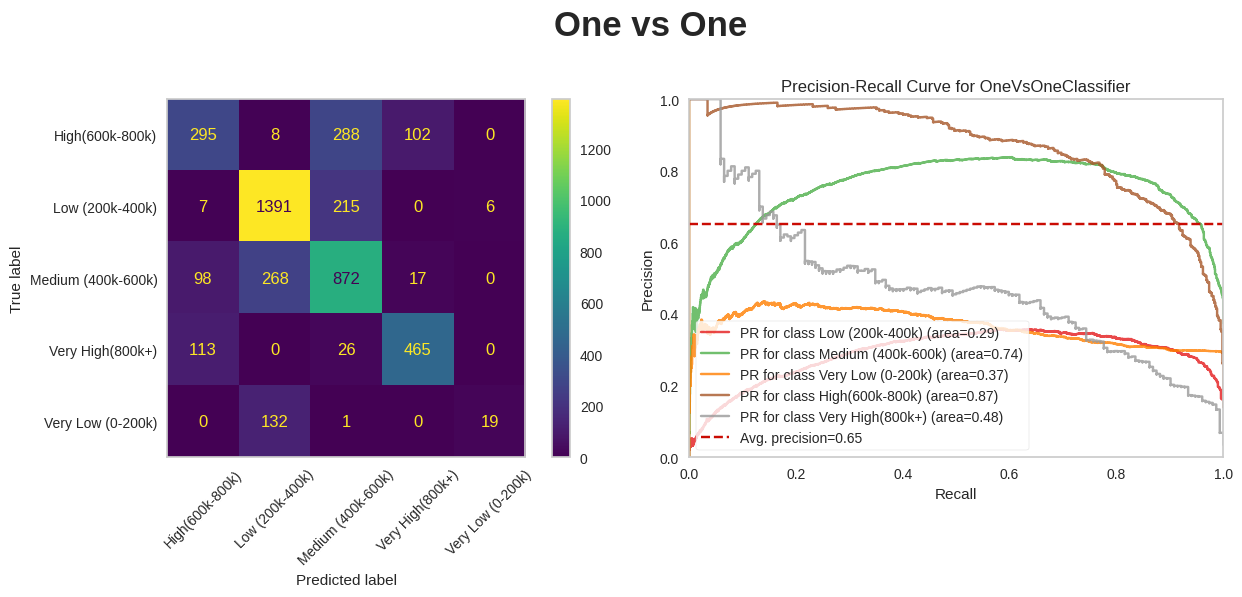

In [29]:
#plot One vs One model
plotModelEval(ovo_model, "One vs One")

- - - - - One vs All - - - - -

Accuracy: 0.6412213740458015




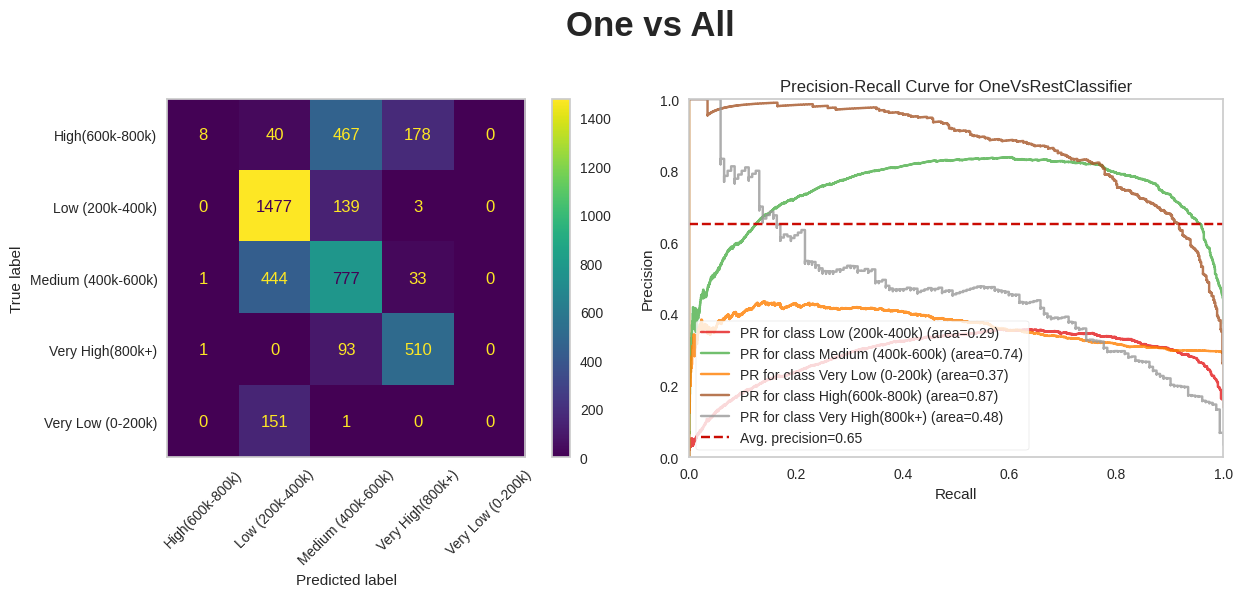

In [12]:
#plot One vs All model
plotModelEval(ova_model, "One vs All")

## Gradient boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [14]:
#One Vs One
ovo_b_m= OneVsOneClassifier(gbc_boost)
ovo_boosted_model = ovo_b_m.fit(X_train, y_train)

- - - - - One vs One Gradiend boosted - - - - -

Accuracy: 0.732824427480916




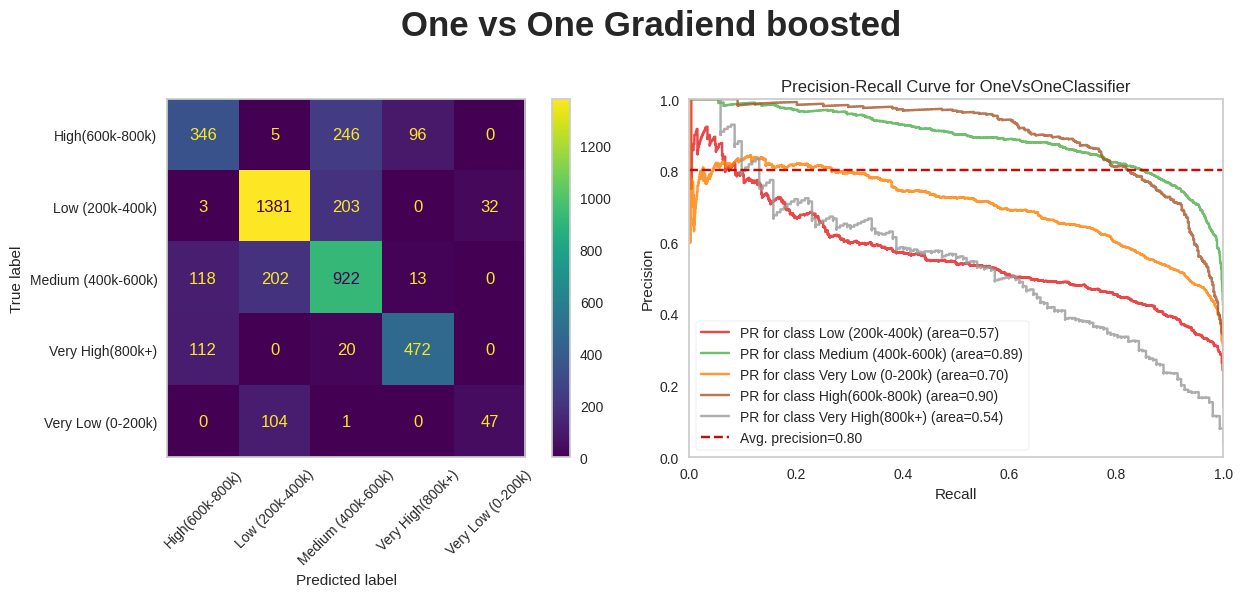

In [15]:
plotModelEval(ovo_boosted_model, "One vs One Gradiend boosted")

In [16]:
#One vs All
ova_b_m= OneVsRestClassifier(gbc_boost)
ova_boosted_model = ova_b_m.fit(X_train, y_train)

- - - - - One vs All Gradiend boosted - - - - -

Accuracy: 0.7263474439046959




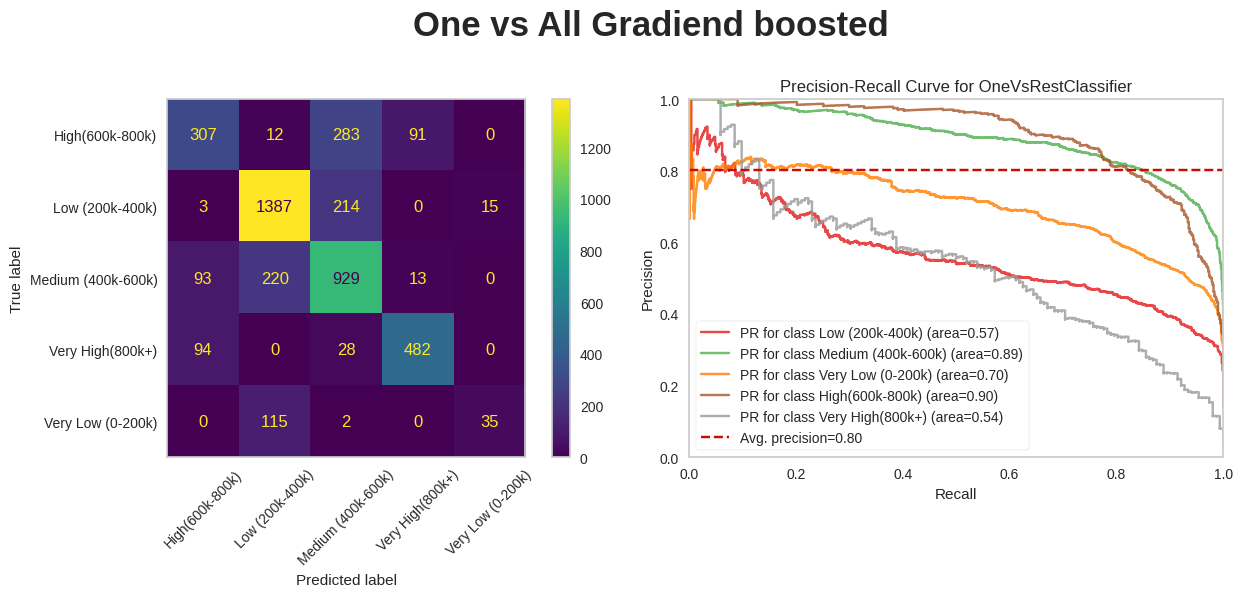

In [17]:
plotModelEval(ova_boosted_model, "One vs All Gradiend boosted")

## xGboosting

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 297.1/297.1 MB 11.6 MB/s eta 0:00:010:00:01

In [30]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5, n_estimators=100, learning_rate=0.1)

In [31]:
#One vs One
ovo_xgb_classifier = OneVsOneClassifier(xgb_classifier)
ovo_xgb_classifier.fit(X_train, y_train)

OneVsOneClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.1, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           num_class=5, num_parallel_tree=None, ...))

- - - - - One vs One xGboosting - - - - -

Accuracy: 0.7462410363173722




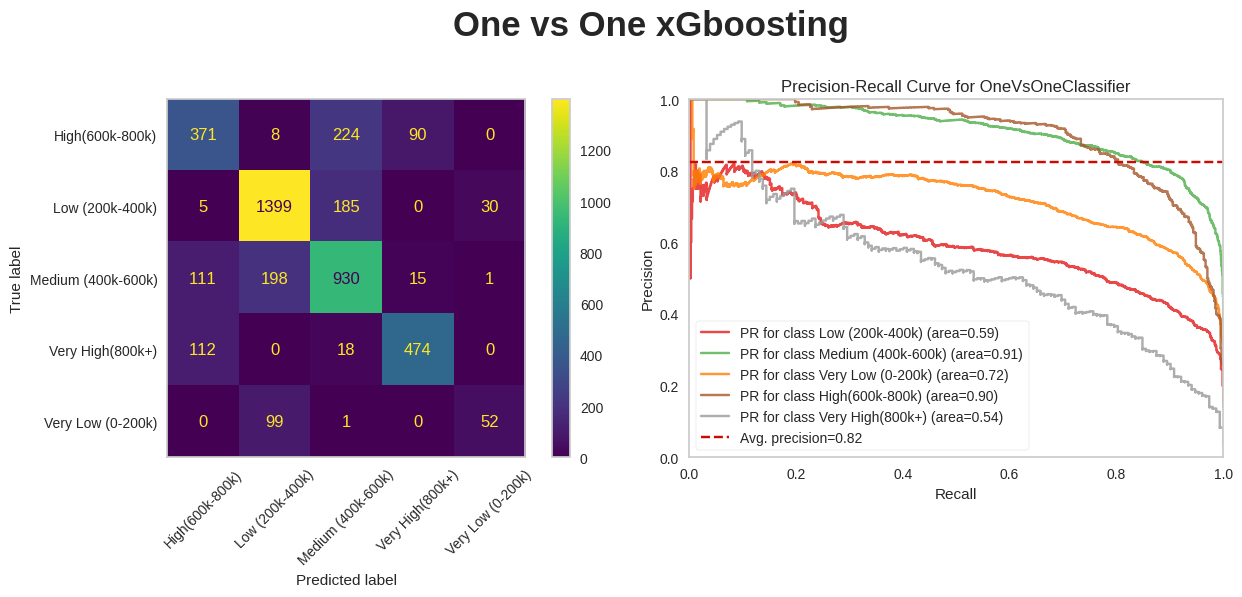

In [32]:
plotModelEval(ovo_xgb_classifier, "One vs One xGboosting")

In [33]:
#One vs All
ova_xgb_classifier = OneVsRestClassifier(xgb_classifier)
ova_xgb_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_class=5, num_parallel_tree=None, ...))

- - - - - One vs All xGboosting - - - - -

Accuracy: 0.7423085820032385




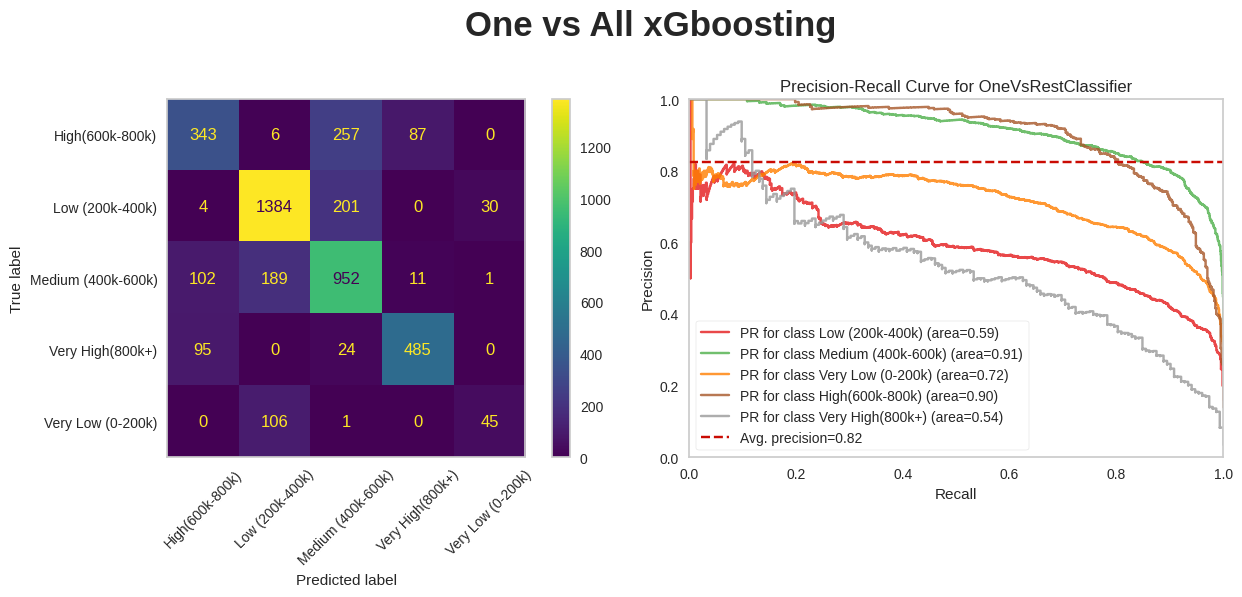

In [34]:
plotModelEval(ova_xgb_classifier, "One vs All xGboosting")

## AdaBoosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

- - - - - AdaBoost - - - - -

Accuracy: 0.5285681239879713




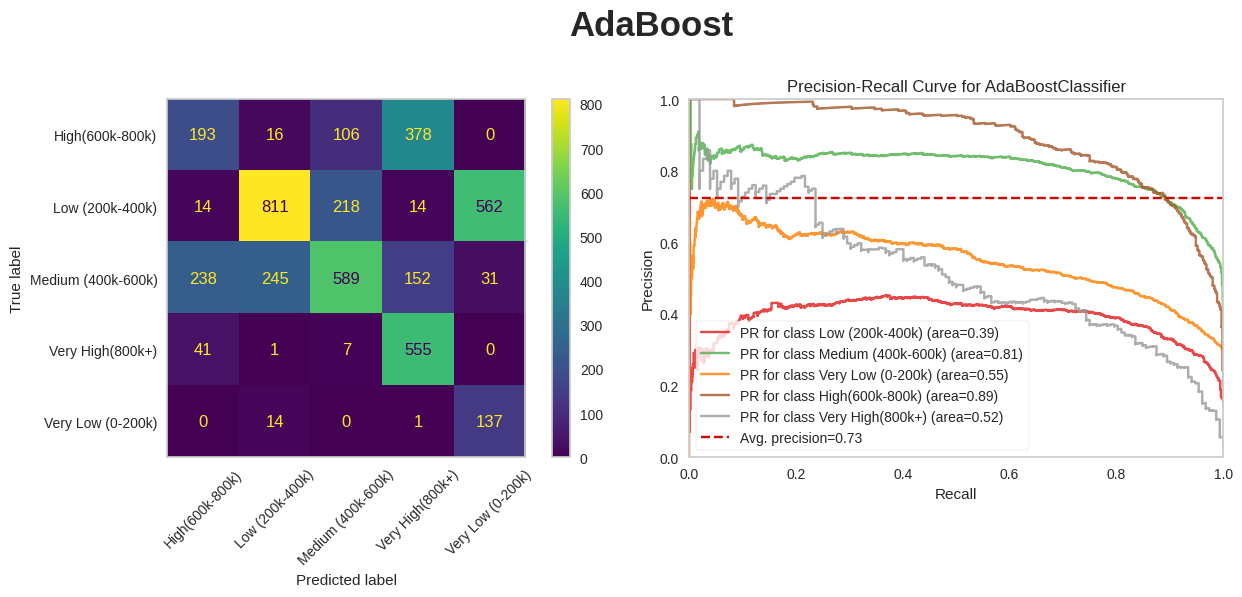

In [36]:
plotModelEval(ada_boost, "AdaBoost")

## CatBoosting

In [ ]:
!pip install catboost

In [ ]:
from catboost.utils import create_cd

cat_features = list(range(0,X.shape[1]))
print(cat_features)

feature_names = dict()
for column, name in enumerate(X_train):
    if column == 0:
        continue
    feature_names[column - 1] = name

create_cd(
    label=0,
    cat_features=list(range(0, X_train.columns.shape[0])),
    feature_names=feature_names
)

print(feature_names)

In [ ]:
from catboost import CatBoostClassifier, Pool

cat_features = list(X.columns.values)

test = [ 'grade']

eval_dataset = Pool(data = X_test, label= y_test, cat_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])                                                                ])

clf = CatBoostClassifier( iterations=10, loss_function='MultiClass')

clf.fit(X_train, y_train)

preds_class = clf.predict(X_test, y_test)

In [ ]:
data = pd.DataFrame({'string_column': ['val0', 'val1', 'val2'],
                     'int_column': [1,2,3],
                     'float_column': [1.2,2,4.1]})
print(data)
print(data.dtypes)

train_data = Pool(
    data=data,
    label=[1, 1, -1],
    weight=[0.1, 0.2, 0.3],
    cat_features=[0, 1]
)

model = CatBoostClassifier(iterations = 10)
model.fit(X=train_data)